### CiFAR 이미지 분류 모델 구현
---
- 데이터: ciFAR-10 
- 학습 방법: 10가지 이미지 종류 분류 => 다중 분류
- 이미지: DNN(MLP), CNN

In [103]:
from tensorflow import random # random seed 설정용
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from tensorflow.keras.datasets.fashion_mnist import load_data
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import plot_model

In [2]:
from keras.datasets import cifar10

[1] 데이터 로딩 및 학습

In [3]:
(train_X, train_y), (test_X, test_y) = cifar10.load_data()

170508288/170498071 [==============================] - 386s 2us/step


In [4]:
train_X.shape, train_y.shape

((50000, 32, 32, 3), (50000, 1))

[2] 데이터 전처리 및 학습 형태로 변환

In [5]:
# 스케일링 => 픽셀/255.0
train_X = train_X/255.0
test_X = test_X/255.0

In [8]:
# 검증용 데이터 준비
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(train_X, train_y,
                                                  stratify=train_y,
                                                  random_state=11)

In [9]:
train_X.shape, val_X.shape

((37500, 32, 32, 3), (12500, 32, 32, 3))

[3] 모델 구성 및 생성

In [104]:
random.set_seed(11)

In [142]:
model = Sequential()

In [143]:
# 이미지 특징 추출 Layer => 첫 번째 입력값 설정
model.add(Conv2D(12, kernel_size=3, padding='same', input_shape=(32, 32, 3))) # 3차원

In [144]:
# 이미지 특징 다운샘플링 Layer => MaxPool2D
model.add(MaxPool2D())

In [145]:
model.add(Conv2D(12, kernel_size=3, padding='same'))
model.add(MaxPool2D())

In [146]:
# 1차원으로 데이터 형태 변환 Layer => Flatten
model.add(Flatten())

In [147]:
model.add(Dense(64, activation='relu'))

In [148]:
model.add(Dropout(0.4))

In [149]:
# 출력층 => Node: 10개(0~9), activation: softmax
model.add(Dense(10, activation='softmax')) # 1차원

In [150]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 12)        336       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 12)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 12)        1308      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 12)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                49216     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

[3-2] 모델 생성

In [151]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 검증 데이터에 대한 loss 값이 3번 연속 개선되지 않으면 학습 중지
stopCB = EarlyStopping(monitor='val_loss', patience=3)

In [152]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [153]:
hist = model.fit(train_X, train_y, 
                 batch_size=20,
                 validation_data = (val_X, val_y),
                 epochs=15,
                 callbacks=[stopCB])

Epoch 1/15
1875/1875 [==============================] - 14s 7ms/step - loss: 1.6933 - accuracy: 0.3891 - val_loss: 1.3852 - val_accuracy: 0.5177
Epoch 2/15
1875/1875 [==============================] - 13s 7ms/step - loss: 1.4039 - accuracy: 0.5022 - val_loss: 1.2266 - val_accuracy: 0.5724
Epoch 3/15
1875/1875 [==============================] - 13s 7ms/step - loss: 1.2735 - accuracy: 0.5510 - val_loss: 1.1673 - val_accuracy: 0.5927
Epoch 4/15
1875/1875 [==============================] - 14s 7ms/step - loss: 1.2044 - accuracy: 0.5756 - val_loss: 1.1065 - val_accuracy: 0.6100
Epoch 5/15
1875/1875 [==============================] - 16s 8ms/step - loss: 1.1653 - accuracy: 0.5893 - val_loss: 1.0951 - val_accuracy: 0.6109
Epoch 6/15
1875/1875 [==============================] - 15s 8ms/step - loss: 1.1241 - accuracy: 0.6009 - val_loss: 1.0828 - val_accuracy: 0.6203
Epoch 7/15
1875/1875 [==============================] - 16s 9ms/step - loss: 1.0939 - accuracy: 0.6134 - val_loss: 1.0928 - val_ac

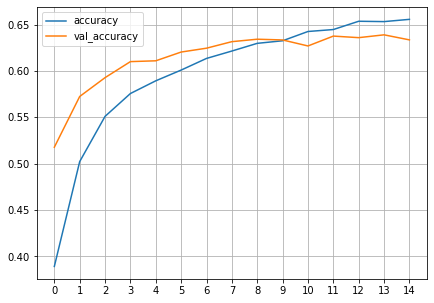

In [154]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xticks(hist.epoch)
plt.legend(['accuracy', 'val_accuracy'])
plt.grid()
plt.show()

[4] 모델 평가

In [155]:
model.evaluate(test_X, test_y)

313/313 [==============================] - 2s 4ms/step - loss: 1.0594 - accuracy: 0.6350


[1.059380054473877, 0.6349999904632568]

[5] 모델 테스트

In [156]:
pre_y = model.predict(test_X[0].reshape(-1, 32, 32, 3))

In [157]:
pre_y.round(2), pre_y.shape

(array([[0.  , 0.  , 0.  , 0.77, 0.  , 0.22, 0.  , 0.  , 0.  , 0.  ]],
       dtype=float32),
 (1, 10))

In [158]:
test_y[0]

array([3], dtype=uint8)

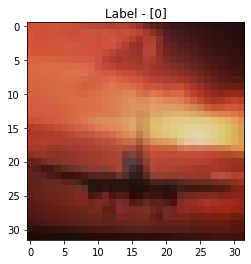

In [159]:
plt.imshow(val_X[103].reshape(32,32,3))
plt.title('Label - {}'.format(val_y[103]))
plt.show()

[6] 새로운 이미지로 테스트

In [160]:
import PIL.Image as pilimg

In [166]:
image = pilimg.open('비행기.jpg')
pix = np.array(image)
pix_scaled = pix/255.

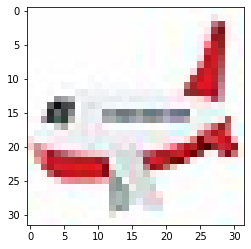

In [167]:
plt.imshow(pix_scaled)
plt.show()

In [171]:
model.predict(pix_scaled.reshape(-1,32,32,3))

array([[9.5144737e-01, 3.9248563e-02, 1.4566536e-06, 1.4567246e-04,
        2.6997108e-07, 1.6202144e-08, 1.6435575e-07, 4.1875925e-12,
        8.8207778e-03, 3.3574537e-04]], dtype=float32)

In [184]:
image2 = pilimg.open('고양이.jpg')
pix2 = np.array(image2)
pix2_scaled = pix2/255.

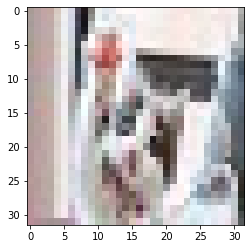

In [185]:
plt.imshow(pix2_scaled)
plt.show()

In [186]:
model.predict(pix2_scaled.reshape(-1,32,32,3))

array([[2.2256971e-04, 9.3939815e-07, 1.4700274e-02, 2.3562282e-01,
        9.8675271e-05, 7.1788275e-01, 1.3145246e-04, 3.0761238e-02,
        3.5509140e-07, 5.7882624e-04]], dtype=float32)